In [1]:
import pandas as pd
import numpy as np

from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML     
import folium


import matplotlib.pyplot as plt
%matplotlib inline 

In [10]:
neighCenterData = pd.read_excel('data/NeighborhoodMaxMinCenter.xlsx')
brgeodf = pd.read_excel('data/BatonRougeGeometryDf.xlsx')
zillow_df = pd.read_excel('data/forsale.xlsx')
api_df = pd.read_excel('data/fsfilter.xlsx')

In [4]:
brMaxLatX = neighCenterData["Max Latitude"].max()
brMinLatX = neighCenterData["Min Latitude"].min()
brMaxLongY = neighCenterData["Max Longitude"].max()
brMinLongY = neighCenterData["Min Longitude"].min()

brCenterLat = np.add(brMinLatX, np.divide(np.subtract(brMaxLatX, brMinLatX), 2))
brCenterLong = np.add(brMinLongY, np.divide(np.subtract(brMaxLongY, brMinLongY), 2))

In [5]:
map_br = folium.Map(location=[brCenterLat, brCenterLong], zoom_start=11)

In [6]:
for lat, long, neighborhood, community in zip(neighCenterData['Center Latitude'],
                                              neighCenterData['Center Longitude'],
                                              neighCenterData['Neighborhood'],
                                              neighCenterData['Community']):
    label = '{}, {}'.format(neighborhood, community)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_br)

In [7]:
label = 'Center Of Baton Rouge'
label = folium.Popup(label, parse_html=True)
folium.features.CircleMarker(
    [brCenterLat, brCenterLong],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#FFCCCB',
    fill_opacity=0.7,
    parse_html=False).add_to(map_br)

In [8]:
map_br

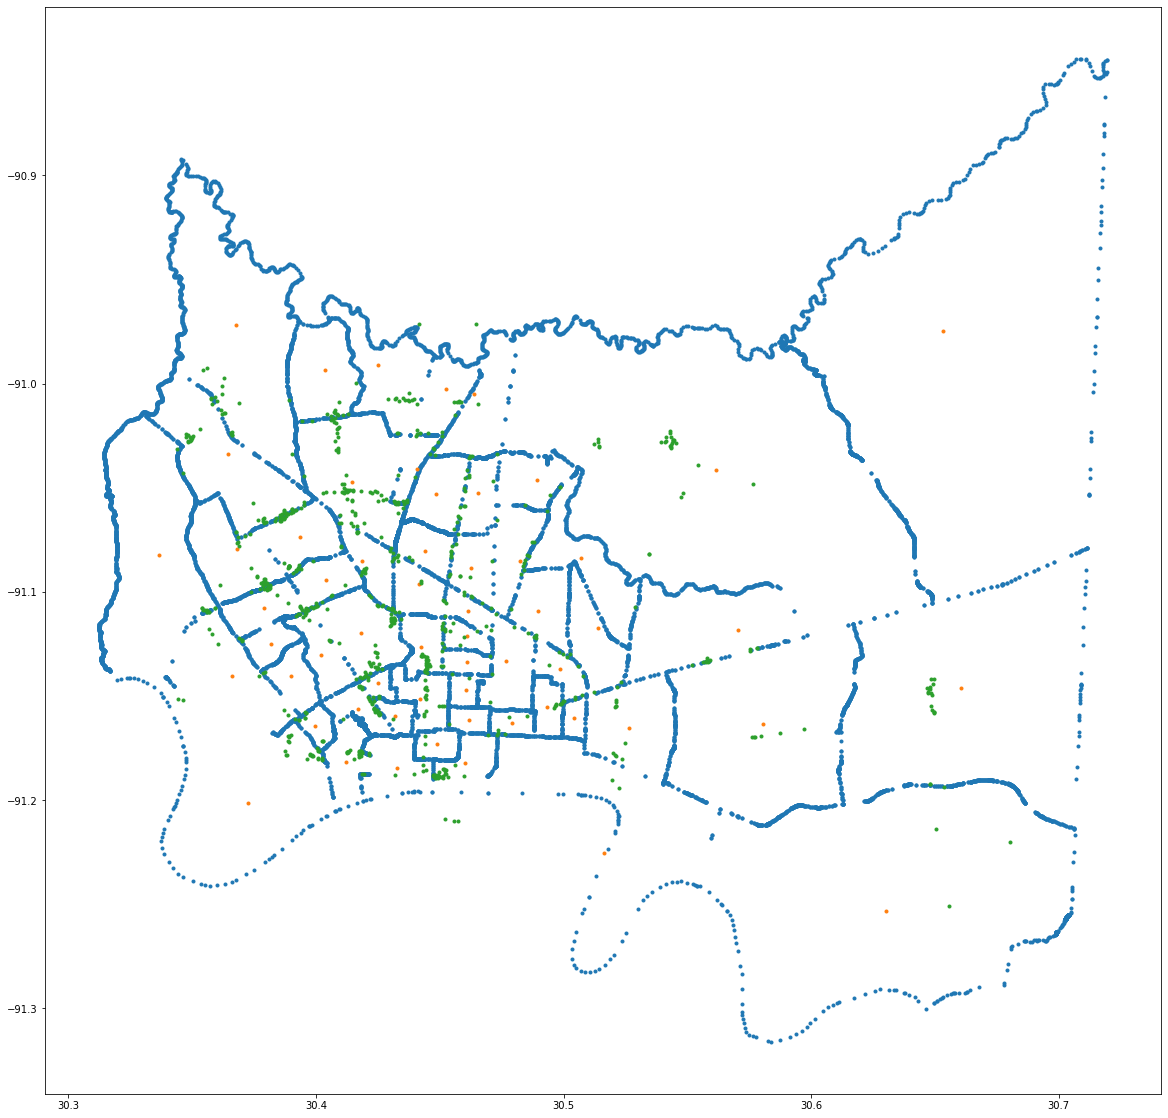

In [12]:
plt.figure(figsize=(20, 20))
plt.scatter(brgeodf['Latitude'], brgeodf['Longitude'], marker='.')
plt.scatter(neighCenterData['Center Latitude'], neighCenterData['Center Longitude'], marker='.')
plt.scatter(api_df['Latitude'], api_df['Longitude'], marker='.')
plt.savefig('coordMapOfBr.png')